# Exercise 1.2 - Kramers Rate

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [7]:
data_dir = Path.cwd() / ".." / "data"
figure_dir = Path.cwd() / ".." / "report" / "figures"

## Identify extrema

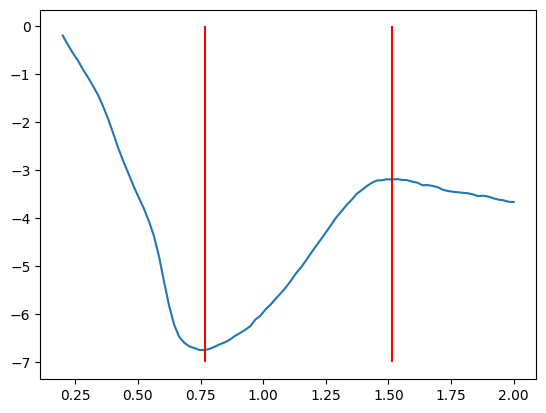

In [56]:
rs, free_energy = np.loadtxt(data_dir / "ex1_free_energy_profile.dat").T
plt.plot(rs, free_energy)

lower_pos = rs[free_energy.argmin()]
upper_pos = rs[free_energy[free_energy.argmin():].argmax() + free_energy.argmin() - 1]

plt.vlines(lower_pos, 0, -7, color="r")
plt.vlines(upper_pos, 0, -7, color="r")
plt.savefig(figure_dir / "ex2_free_energy_extrema.pdf")

## Polynomial Fit to the extrema

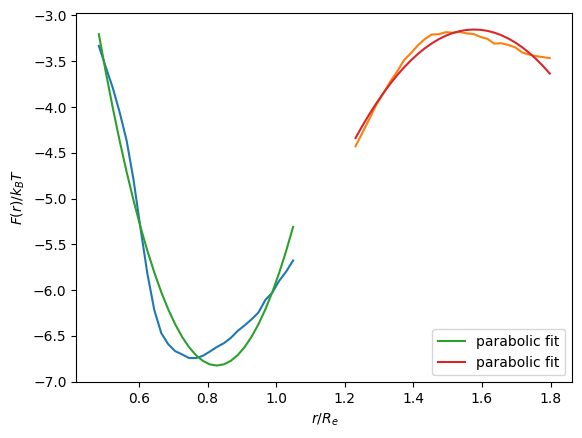

In [57]:
env_size = .3
lower_mask = np.logical_and(lower_pos - env_size < rs, rs < lower_pos + env_size)
upper_mask = np.logical_and(upper_pos - env_size < rs, rs < upper_pos + env_size)

lower_rs, lower_fe = rs[lower_mask], free_energy[lower_mask]
upper_rs, upper_fe = rs[upper_mask], free_energy[upper_mask]

assert lower_rs.shape[0] > 20
assert upper_rs.shape[0] > 20

plt.plot(lower_rs, lower_fe)
plt.plot(upper_rs, upper_fe)

def f(x, a, b, c):
    return x*x*a + x*b + c

lower_ps, _ = scipy.optimize.curve_fit(f, lower_rs, lower_fe)
plt.plot(lower_rs, f(lower_rs, *lower_ps), label="parabolic fit")

upper_ps, _ = scipy.optimize.curve_fit(f, upper_rs, upper_fe)
plt.plot(upper_rs, f(upper_rs, *upper_ps), label="parabolic fit")

plt.legend()
plt.ylabel("$F(r)/k_B T$")
plt.xlabel("$r/R_e$")
plt.savefig(figure_dir / "ex2_parabolic_fit.pdf")

## Finally calculate Kramers Rate

In [55]:
diffusion_d = 8.6e-6
fpp_max = upper_ps[0]
fpp_min = lower_ps[0]
delta_f = 3.56

kramers_rate = diffusion_d/np.pi * np.sqrt(np.abs(fpp_max * fpp_min)) * np.exp(-delta_f)
print(f"The kramers rate is {kramers_rate:.4e}.")

The kramers rate is 1.3551e-06.
